In [1]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 717.2 kB/s eta 0:00:00a 0:00:01


In [2]:
import os 
import random 
import string
import calendar
import folium
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go 
import chart_studio.plotly as py
from datetime import datetime
from PIL import Image
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from plotly import tools 
 
init_notebook_mode (connected=True)
punc = string.punctuation

#Load data
df = pd.read_csv("../input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv")
df.head()


,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [3]:
# additional features
df ['date'] = pd.to_datetime (df['date'])
df ['year'] = df['date'].dt.year
df ['month'] = df['date'].dt.month
df ['monthday'] = df['date'].dt.day
df ['weekday'] = df['date'].dt.weekday
df ['loss'] = df['n_killed'] + df['n_injured']

[2017, 2016, 2015, 2014, 2018, 2013] [61401, 58763, 53579, 51854, 13802, 278]


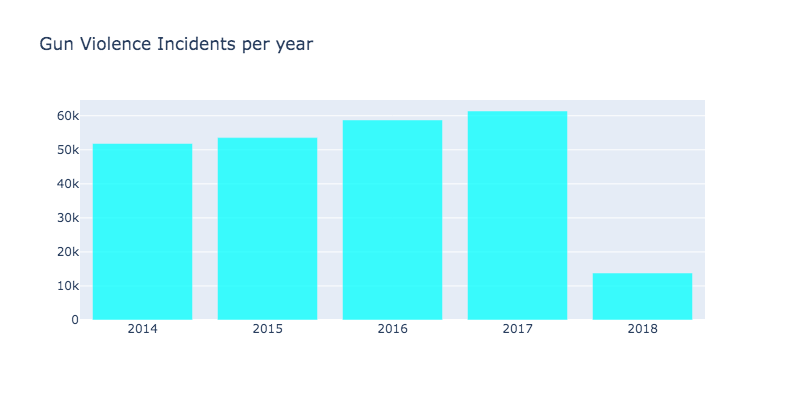

In [4]:
# Number of incidents per year
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

x, y = create_stack_bar_data ('year')
print (x,y)
x = x[:-1]
y = y[:-1]
trace1 = go.Bar(x =x, y=y, opacity = 0.75, name = "year count", marker = dict(color='cyan'))
layout = dict (height = 400, title = 'Gun Violence Incidents per year', legend = dict (orientation="h"))
fig = go.Figure(data=[trace1], layout=layout)
iplot (fig)

[1, 3, 7, 8, 5, 10, 9, 2, 6, 4, 12, 11] [23091, 22640, 21126, 21040, 19930, 19890, 19656, 18841, 18755, 18628, 18106, 17974]


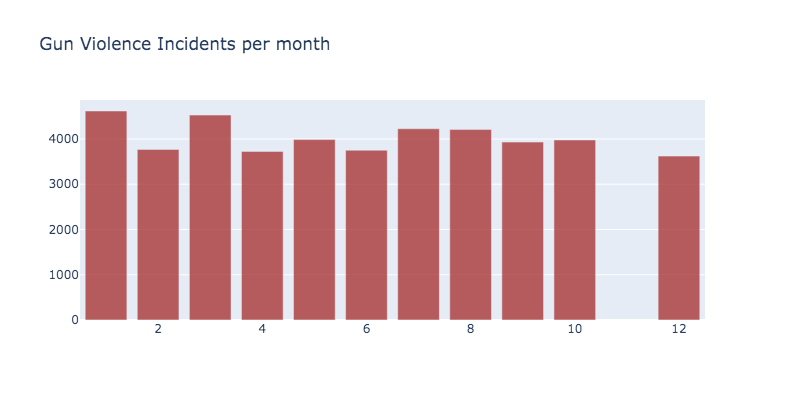

In [5]:

x, y = create_stack_bar_data ('month')
print (x,y)
x = x[:-1]
y = y[:-1]
y = [n /5  for n in y]
trace1 = go.Bar(x =x, y=y, opacity = 0.75, name = "month count", marker = dict(color='brown'))
layout = dict (height = 400, title = 'Gun Violence Incidents per month', legend = dict (orientation="h"))
fig = go.Figure(data=[trace1], layout=layout)
iplot (fig)

Number of incidents and casualities per year

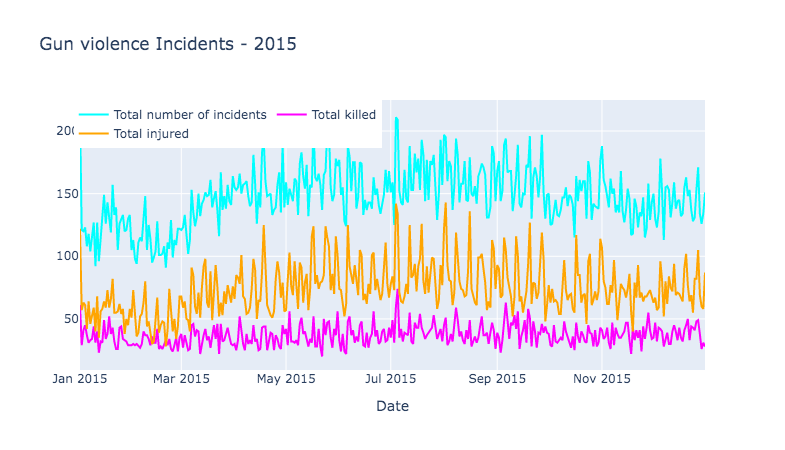

In [6]:
temp = df[df['year'] == 2015].groupby("date").agg({'state':'count', 'n_killed': 'sum', 'n_injured': 'sum'}).reset_index().rename(columns = {'state':'incidents'})
temp.head()
trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total number of incidents', mode="lines", marker = dict(color="cyan"))
trace2= go.Scatter(x = temp.date, y= temp.n_killed, name= 'Total killed', mode ="lines", marker = dict (color = "magenta"))
trace3= go.Scatter(x = temp.date, y= temp.n_injured, name= 'Total injured', mode ="lines", marker = dict (color = "orange"))
data = [trace1, trace2, trace3]
layout = dict (height =450, title = "Gun violence Incidents - 2015", legend = dict(orientation = "h", x = -.01, y =1), xaxis = dict(title = "Date", ticklen=2))
fig = dict (data=data, layout = layout )
iplot (fig)


Incidents per state

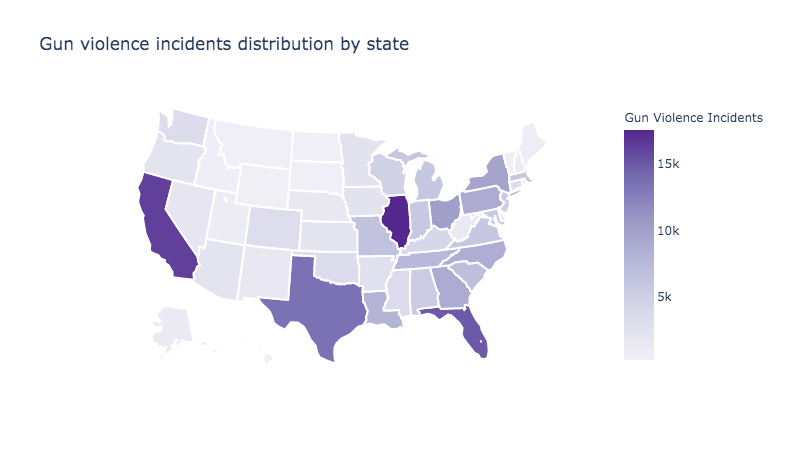

In [7]:
temp_states_df = df['state'].value_counts()
states_df = pd.DataFrame()
states_df ['state'] = temp_states_df.index
states_df ['counts'] = temp_states_df.values

scale = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
states_df['state_code']=states_df['state'].apply(lambda x : state_to_code[x])

data = [dict(
        type = "choropleth",
        colorscale = scale, 
        autocolorscale = False, 
        locations = states_df ['state_code'],
        z = states_df['counts'],
        locationmode = 'USA-states',
        text = states_df ['state'],
        marker = dict (line = dict (color = 'white', width=2)),
        colorbar = dict (title = "Gun Violence Incidents"))]
layout = dict(
         title = "Gun violence incidents distribution by state",
         geo = dict(
         scope = 'usa',
         projection = dict(type='albers usa'),
         showlakes = True, 
         lakecolor = 'white'))
fig = dict (data = data, layout = layout)
iplot (fig, filename = 'd3-cloropleth-map')

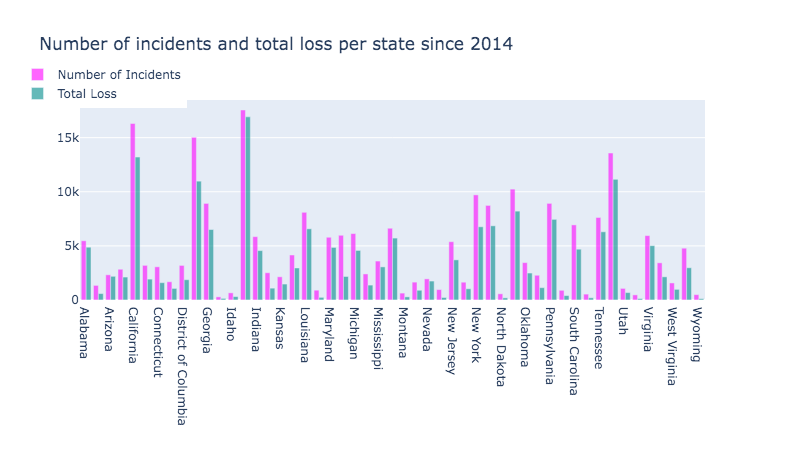

In [8]:
state_df = df.reset_index().groupby(by =['state']).agg({'loss':'sum','year':'count'}).rename(columns={'year':'count'})
state_df['state']=state_df.index
state_df.head()

trace1 = go.Bar(x=state_df['state'],
                y=state_df['count'],
                name = 'Number of Incidents',
                marker = dict (color='magenta'),
                opacity = 0.6)
trace2 = go.Bar(x=state_df['state'],
                y=state_df['loss'],
                name = 'Total Loss',
                marker = dict (color='darkcyan'),
                opacity = 0.6)
data = [trace1, trace2]
layout = go.Layout(
        barmode ='group',
        margin=dict(b=150),
        legend=dict(dict(x=-.1, y=1.2)),
        title = 'Number of incidents and total loss per state since 2014',)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [9]:
# Areas with most violent gun incidents
limits = []

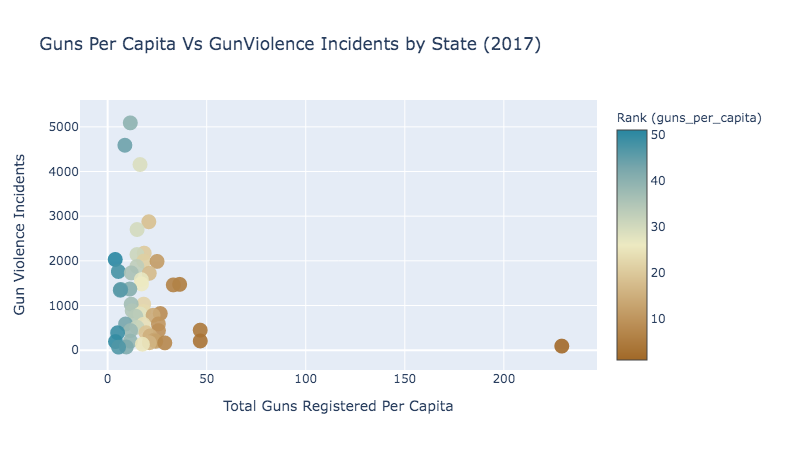

In [10]:
from io import StringIO

ownership = StringIO("""Rank,state,guns_per_capita,guns_registered
1,Wyoming,229.24,132806
2,Washington D.C.,68.05,47228
3,New Hampshire,46.76,64135
4,New Mexico,46.73,97580
5,Virginia,36.34,307822
6,Alabama,33.15,161641
7,Idaho,28.86,49566
8,Arkansas,26.57,79841
9,Nevada,25.64,76888
10,Arizona,25.61,179738
11,Louisiana,24.94,116831
12,South Dakota,24.29,21130
13,Utah,23.48,72856
14,Connecticut,22.96,82400
15,Alaska,21.38,15824
16,Montana,21.06,22133
17,South Carolina,21.01,105601
18,Texas,20.79,588696
19,West Virginia,19.42,35264
20,Pennsylvania,18.45,236377
21,Georgia,18.22,190050
22,Kentucky,18.2,81068
23,Oklahoma,18.13,71269
24,Kansas,18.06,52634
25,North Dakota,17.56,13272
26,Indiana,17.1,114019
27,Maryland,17.03,103109
28,Colorado,16.48,92435
29,Florida,16.35,343288
30,Ohio,14.87,173405
31,North Carolina,14.818,152238
32,Oregon,14.816,61383
33,Tennessee,14.76,99159
34,Minnesota,14.22,79307
35,Washington,12.4,91835
36,Missouri,11.94,72996
37,Mississippi,11.89,35494
38,Nebraska,11.57,22234
39,Maine,11.5,15371
40,Illinois,11.44,146487
41,Wisconsin,11.19,64878
42,Vermont,9.41,5872
43,Iowa,9.05,28494
44,California,8.71,344622
45,Michigan,6.59,65742
46,New Jersey,6.38,57507
47,Hawaii,5.5,7859
48,Massachusetts,5.41,37152
49,Delaware,5.04,4852
50,Rhode Island,3.98,37152
51,New York,3.83,76207""")

ownership = pd.read_csv(ownership)

states_df = df[df['year'] == 2017]['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
statesdf = statesdf.merge(ownership, on='state')

data = [
    {
        'x': statesdf['guns_per_capita'],
        'y': statesdf['counts'],
        'mode': 'markers',
        'text' : statesdf['state'],
        'marker': {
            'color': statesdf['Rank'],
            'size': 15,
            'showscale' : True,
            'colorscale' : 'Earth',
            "colorbar" : dict(
                title='Rank (guns_per_capita)'
            ),
            'opacity': 0.9
        }
    }
]

layout = go.Layout(title="Guns Per Capita Vs GunViolence Incidents by State (2017)", 
                   xaxis=dict(title='Total Guns Registered Per Capita'),
                   yaxis=dict(title='Gun Violence Incidents')
                  
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter-colorscale')